# GENERATE COMBINED DATASET

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/h7/qvwlww5x1b3dtn1tdg2f4vrc0000gn/T/ipykernel_14736/2992485995.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
loan_data = pd.read_csv("../processed_data/loan_data.csv")
loan_data

,loan_id,cust_id,loan_reason,requested_amount,payback_amount,installment,cat_number_accounts,cat_number_loans_accounts
0,222998,1,Car,10000,12700.08,352.78,1,0
1,222995,2,Financial,5000,6900.00,287.50,1,0
2,222992,3,Car,7000,8890.08,370.42,1,0
3,222989,4,Car,4000,5080.32,70.56,1,1
4,222986,5,Car,10000,12699.84,264.58,1,2
...,...,...,...,...,...,...,...,...
36171,103016,39995,Personal,7000,9239.76,128.33,1,0
36172,103013,39996,Car,10000,12700.08,529.17,2,1
36173,103010,39997,Housing,15000,17250.24,359.38,2,0
36174,103007,39998,Financial,10000,13800.00,230.00,3,0


In [3]:
customer_data = pd.read_csv("../processed_data/customer_data.csv")
customer_data

,cust_id,gender,religion,employment,postal_code,number_client_calls_to_ING,cat_number_client_calls_from_ING,age,relationship_length
0,0,M,U,Public Sector,20,0,0,NaN,NaN
1,1,M,C,Private Sector,30,0,5,36.0,2.0
2,2,M,C,Private Sector,20,0,0,42.0,4.0
3,3,F,J,Unemployed,10,5,5,39.0,3.0
4,4,M,U,Private Sector,70,0,0,38.0,1.0
...,...,...,...,...,...,...,...,...,...
39809,39994,F,O,Unemployed,30,0,0,38.0,3.0
39810,39995,M,J,Private Sector,50,2,2,37.0,3.0
39811,39997,F,J,Self-employed,20,0,1,26.0,2.0
39812,39998,M,U,Public Sector,40,4,5,42.0,3.0


In [4]:
finance_data = pd.read_csv("../processed_data/customer_financials.csv")
finance_data

,cust_id,average_salary,average_current_acc_balance,average_saving_account_balance,average_credit_card_balance,average_monthly_balance,average_debt_to_income_ratio
0,0,1333.446111,1904.599722,4470.665278,NaN,3187.632500,NaN
1,1,NaN,1832.253939,NaN,NaN,NaN,NaN
2,2,NaN,755.230000,2786.745000,NaN,1770.987500,NaN
3,3,1584.795000,-675.707500,23.578750,NaN,-326.064375,NaN
4,4,1527.442353,1550.418235,1444.917059,1761.714706,1497.667647,1.496681
...,...,...,...,...,...,...,...
35317,39994,3111.351333,-162.762667,1410.700000,NaN,623.968667,NaN
35318,39995,1543.714583,-1155.817083,2489.885833,NaN,667.034375,NaN
35319,39996,1738.207500,1685.361250,2978.980000,NaN,2332.170625,NaN
35320,39998,NaN,560.767895,2124.778421,NaN,1342.773158,NaN


In [5]:
deliq_data = pd.read_csv("../processed_data/loan_deliquencies.csv")
deliq_data

,loan_id,is_default
0,222998,1
1,222992,1
2,222986,0
3,222980,0
4,222974,0
...,...,...
15280,103043,0
15281,103025,1
15282,103016,0
15283,103013,0


In [6]:
# Merge them all
default_df = loan_data.merge(customer_data, how="outer", on=["cust_id"]).merge(\
    finance_data, how="outer", on=["cust_id"]).merge(\
        deliq_data, how="outer", on=["loan_id"])
    
default_df

,loan_id,cust_id,loan_reason,requested_amount,payback_amount,installment,cat_number_accounts,cat_number_loans_accounts,gender,religion,...,cat_number_client_calls_from_ING,age,relationship_length,average_salary,average_current_acc_balance,average_saving_account_balance,average_credit_card_balance,average_monthly_balance,average_debt_to_income_ratio,is_default
0,103004.0,39999.0,Car,5000.0,6349.92,264.58,1.0,0.0,M,C,...,0.0,31.0,3.0,2446.784000,-584.426000,81.126667,809.798667,-251.649667,0.331706,NaN
1,103007.0,39998.0,Financial,10000.0,13800.00,230.00,3.0,0.0,M,U,...,5.0,42.0,3.0,NaN,560.767895,2124.778421,NaN,1342.773158,NaN,1.0
2,103010.0,39997.0,Housing,15000.0,17250.24,359.38,2.0,0.0,F,J,...,1.0,26.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103013.0,39996.0,Car,10000.0,12700.08,529.17,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,1738.207500,1685.361250,2978.980000,NaN,2332.170625,NaN,0.0
4,103016.0,39995.0,Personal,7000.0,9239.76,128.33,1.0,0.0,M,J,...,2.0,37.0,3.0,1543.714583,-1155.817083,2489.885833,NaN,667.034375,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42011,NaN,39976.0,NaN,NaN,NaN,NaN,NaN,NaN,M,U,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42012,NaN,39978.0,NaN,NaN,NaN,NaN,NaN,NaN,F,O,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42013,NaN,39982.0,NaN,NaN,NaN,NaN,NaN,NaN,M,C,...,5.0,NaN,NaN,NaN,1183.868889,0.000000,513.698611,591.934444,NaN,NaN
42014,NaN,39984.0,NaN,NaN,NaN,NaN,NaN,NaN,M,U,...,0.0,NaN,NaN,1966.213333,794.740000,832.493056,465.061667,813.616528,0.265616,NaN


### Analyzing Missing Values

In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = (default_df.isna().mean() * 100).round(2)

# Display the result
print("Missing Value Percentage for Each Column:")
print(missing_percentage)

Missing Value Percentage for Each Column:
loan_id                              9.10
cust_id                              4.80
loan_reason                         13.90
requested_amount                    13.90
payback_amount                      13.90
installment                         13.90
cat_number_accounts                 13.90
cat_number_loans_accounts           13.90
gender                               5.24
religion                             5.24
employment                           5.24
postal_code                          5.24
number_client_calls_to_ING           5.24
cat_number_client_calls_from_ING     5.24
age                                 14.34
relationship_length                 14.34
average_salary                      33.22
average_current_acc_balance         18.67
average_saving_account_balance      22.76
average_credit_card_balance         67.28
average_monthly_balance             25.29
average_debt_to_income_ratio        73.99
is_default                        

In [8]:
# When loan_id is missing, then there is no point to analyze them at first place.
# Drop rows where the value in 'loan_id' is null
default_df = default_df.dropna(subset=["loan_id"])
len(default_df)

38192

In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = (default_df.isna().mean() * 100).round(2)

# Display the result
print("Missing Value Percentage for Each Column:")
print(missing_percentage)

Missing Value Percentage for Each Column:
loan_id                              0.00
cust_id                              5.28
loan_reason                          5.28
requested_amount                     5.28
payback_amount                       5.28
installment                          5.28
cat_number_accounts                  5.28
cat_number_loans_accounts            5.28
gender                               5.77
religion                             5.77
employment                           5.77
postal_code                          5.77
number_client_calls_to_ING           5.77
cat_number_client_calls_from_ING     5.77
age                                  5.77
relationship_length                  5.77
average_salary                      33.05
average_current_acc_balance         18.41
average_saving_account_balance      22.55
average_credit_card_balance         67.05
average_monthly_balance             25.09
average_debt_to_income_ratio        73.78
is_default                        

<Axes: >

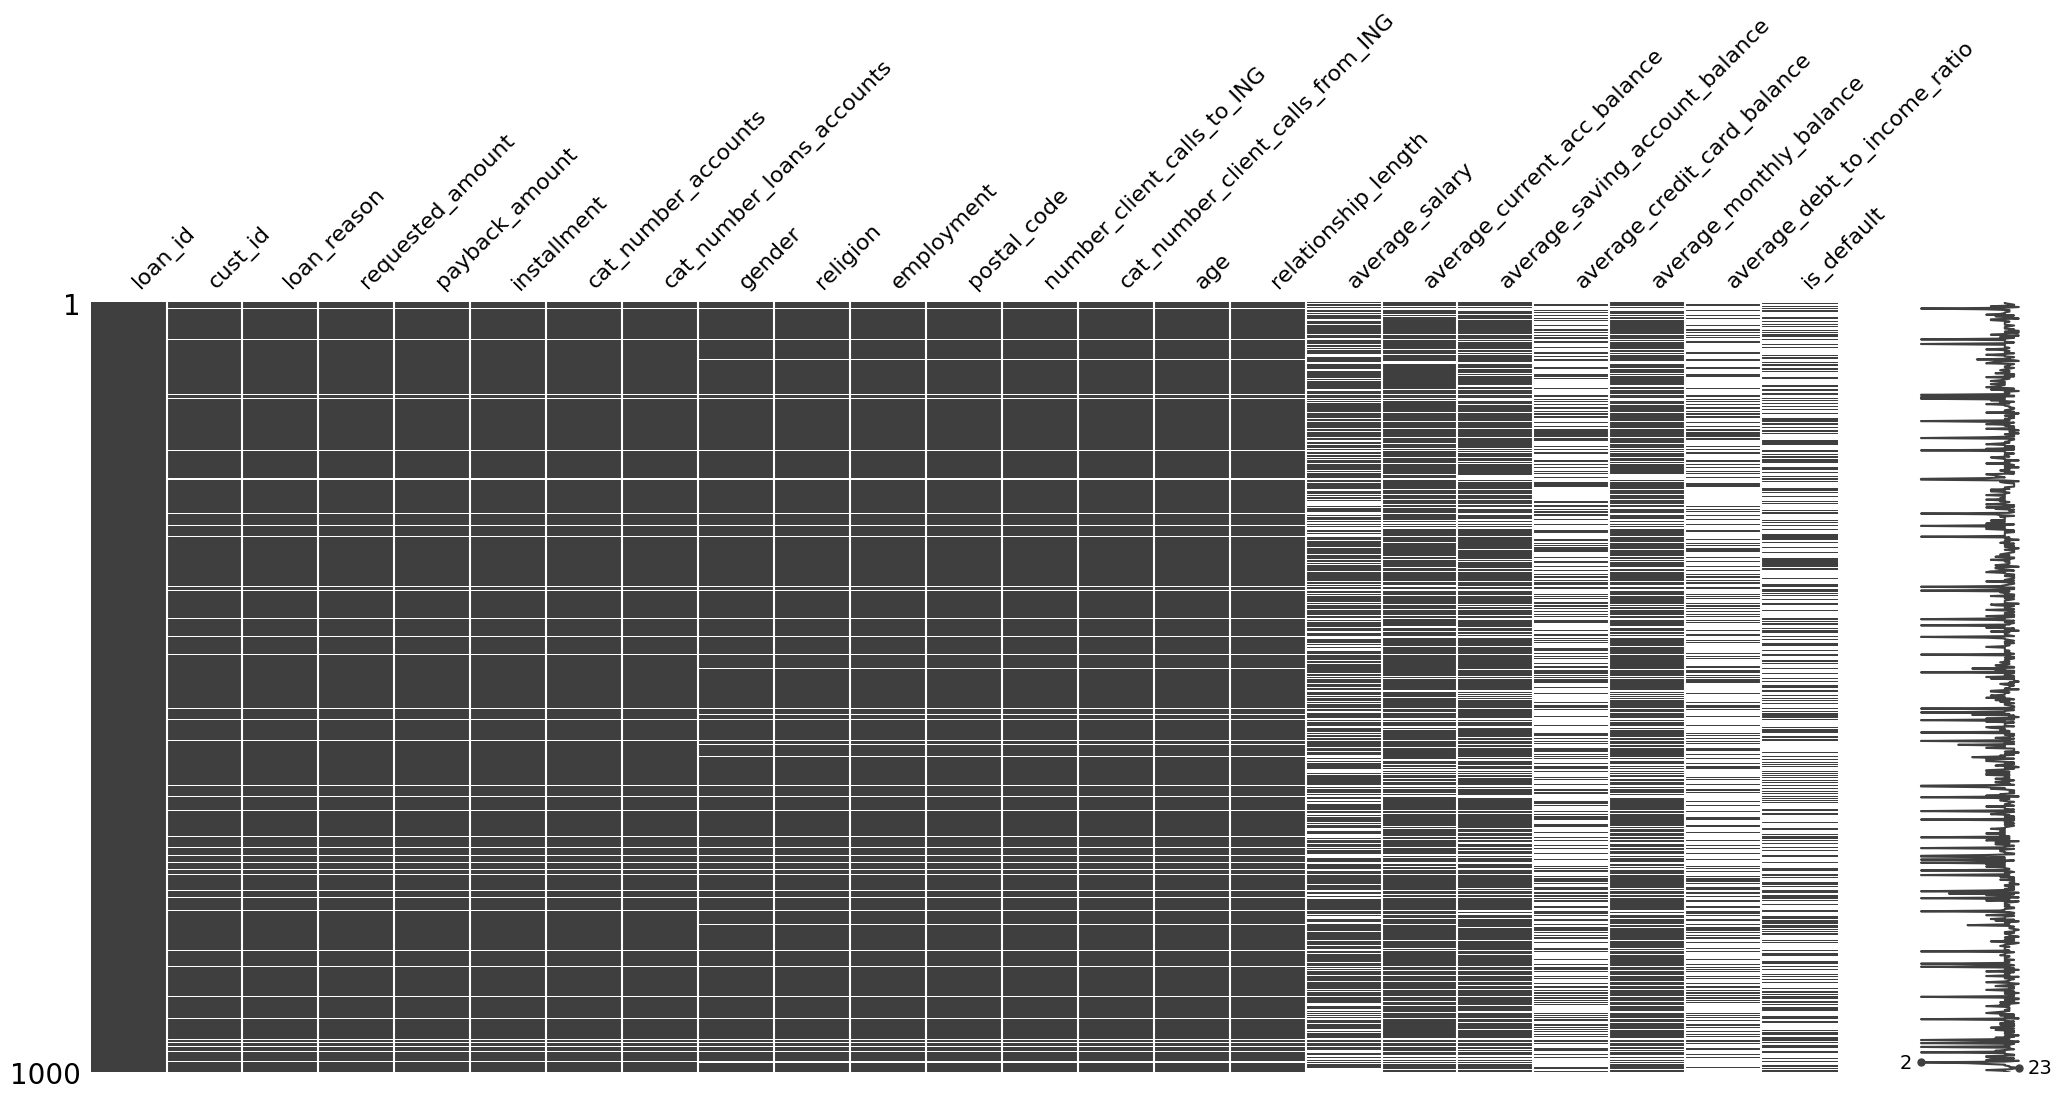

In [10]:
msno.matrix(default_df.sample(1000))

In [11]:
# From missingno analysis, drop rows where the value in columns of 'cust_id', 'loan_reason', 'requested_amount',
# 'payback_amount', 'installment', 'cat_number_accounts',
# 'cat_number_loans_accounts', 'gender', 'religion', 'employment', 'postal_code', 
# 'number_client_calls_to_ING', 'cat_number_client_calls_from_ING', 'age', 'relationship_length' are together null.
# Since there are many samples.
default_df = default_df.dropna(subset=["cust_id", "loan_reason", "requested_amount",
       "payback_amount", "installment", "cat_number_accounts",
       "cat_number_loans_accounts", "gender", "religion", "employment",
       "postal_code", "number_client_calls_to_ING",
       "cat_number_client_calls_from_ING", "age", "relationship_length"], how="all")
len(default_df)

36176

In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = (default_df.isna().mean() * 100).round(2)

# Display the result
print("Missing Value Percentage for Each Column:")
print(missing_percentage)

# 0.51 percentage is really less, just drop them. We can impute remaning features since they \
# can have interpretation.

Missing Value Percentage for Each Column:
loan_id                              0.00
cust_id                              0.00
loan_reason                          0.00
requested_amount                     0.00
payback_amount                       0.00
installment                          0.00
cat_number_accounts                  0.00
cat_number_loans_accounts            0.00
gender                               0.51
religion                             0.51
employment                           0.51
postal_code                          0.51
number_client_calls_to_ING           0.51
cat_number_client_calls_from_ING     0.51
age                                  0.51
relationship_length                  0.51
average_salary                      29.32
average_current_acc_balance         13.87
average_saving_account_balance      18.23
average_credit_card_balance         65.21
average_monthly_balance             20.91
average_debt_to_income_ratio        72.32
is_default                        

In [13]:
# Drop rows where the value in some features are null since they are really small, 0.51 percent
default_df = default_df.dropna(subset=["gender", "religion", "employment",
       "postal_code", "number_client_calls_to_ING",
       "cat_number_client_calls_from_ING", "age", "relationship_length"])
len(default_df)

35990

In [14]:
# I will assume that all null values in is_default are NON-DEFAULT. Since they have
# nothing to do with delinquency. Let's fill in.
default_df["is_default"] = default_df["is_default"].fillna(0)
len(default_df)

35990

<Axes: >

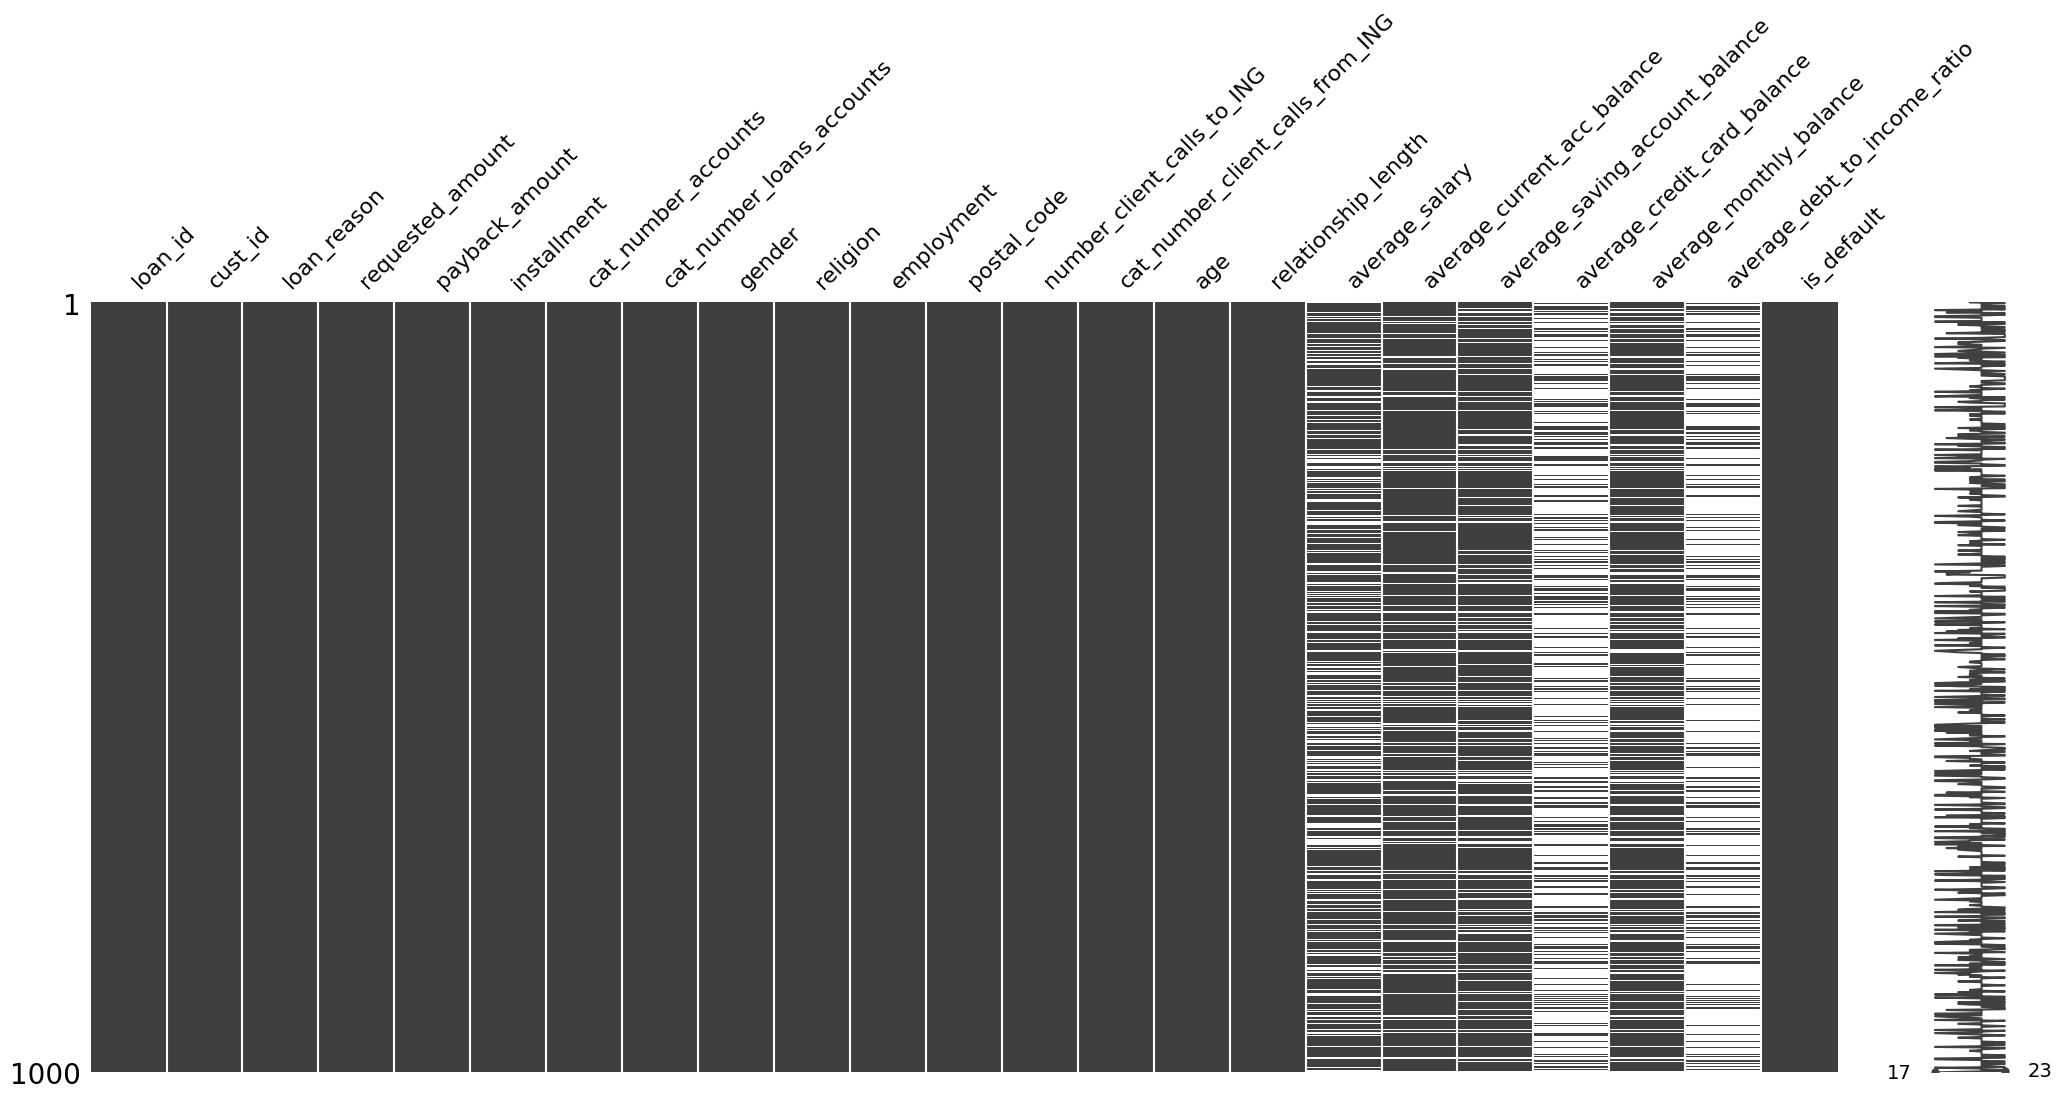

In [15]:
msno.matrix(default_df.sample(1000))

In [16]:
# Calculate the percentage of missing values for each column
missing_percentage = (default_df.isna().mean() * 100).round(2)

# Display the result
print("Missing Value Percentage for Each Column:")
print(missing_percentage)

# I will impute null values in 'average_salary', 'average_current_acc_balance',
# 'average_saving_account_balance', 'average_credit_card_balance', 'average_monthly_balance', 
# 'average_debt_to_income_ratio' wisely since they have many mising values relatively. 
# It will degrade the model performance if we simply remove NAs since data size will shrink a lot.

Missing Value Percentage for Each Column:
loan_id                              0.00
cust_id                              0.00
loan_reason                          0.00
requested_amount                     0.00
payback_amount                       0.00
installment                          0.00
cat_number_accounts                  0.00
cat_number_loans_accounts            0.00
gender                               0.00
religion                             0.00
employment                           0.00
postal_code                          0.00
number_client_calls_to_ING           0.00
cat_number_client_calls_from_ING     0.00
age                                  0.00
relationship_length                  0.00
average_salary                      29.34
average_current_acc_balance         13.86
average_saving_account_balance      18.24
average_credit_card_balance         65.21
average_monthly_balance             20.92
average_debt_to_income_ratio        72.31
is_default                        

In [17]:
# They are not required anymore. Drop them in case we include them, we can have
# data likage depending on how the overall data is generated.
default_df.drop(columns=["loan_id", "cust_id"], inplace=True)
len(default_df)

35990

### Imputation strategies:
 * 1- When the number of rows with missing values is relatively small and these instances won't significantly impact my analysis, I generally choose to remove those rows. As in the case with the previous chapter. 
 * 2- If it is not the case and I have limited time, I replace missing values with the mode (most frequent category) for the categorical features, with the mean/median for numerical features. However, in some cases, I create a new category to represent missing values. This approach allows the model to recognize and learn from the absence of information. 
 * 3- If I have enough time, I will train a predictive model (e.g., a classifier) to predict missing categorical values based on other features when I believe that the missing values follow a certain pattern that can be predicted.

For our case, I assume that NA values are coming from the first customers of ING who don't have any accounts. That's why I am planing to stick to number 2 and create a new category for missing values. It will tell the model that they are fresh customers or deactive customers.

#### Check my assumption

In [18]:
# Create a boolean mask for rows with null values in specified columns
mask = default_df[["average_salary", "average_current_acc_balance",
       "average_saving_account_balance", "average_credit_card_balance",
       "average_monthly_balance", "average_debt_to_income_ratio"]].isnull().all(axis=1)

# Use the boolean mask to filter rows
rows_with_nulls = default_df.loc[mask]
len(rows_with_nulls)

3957

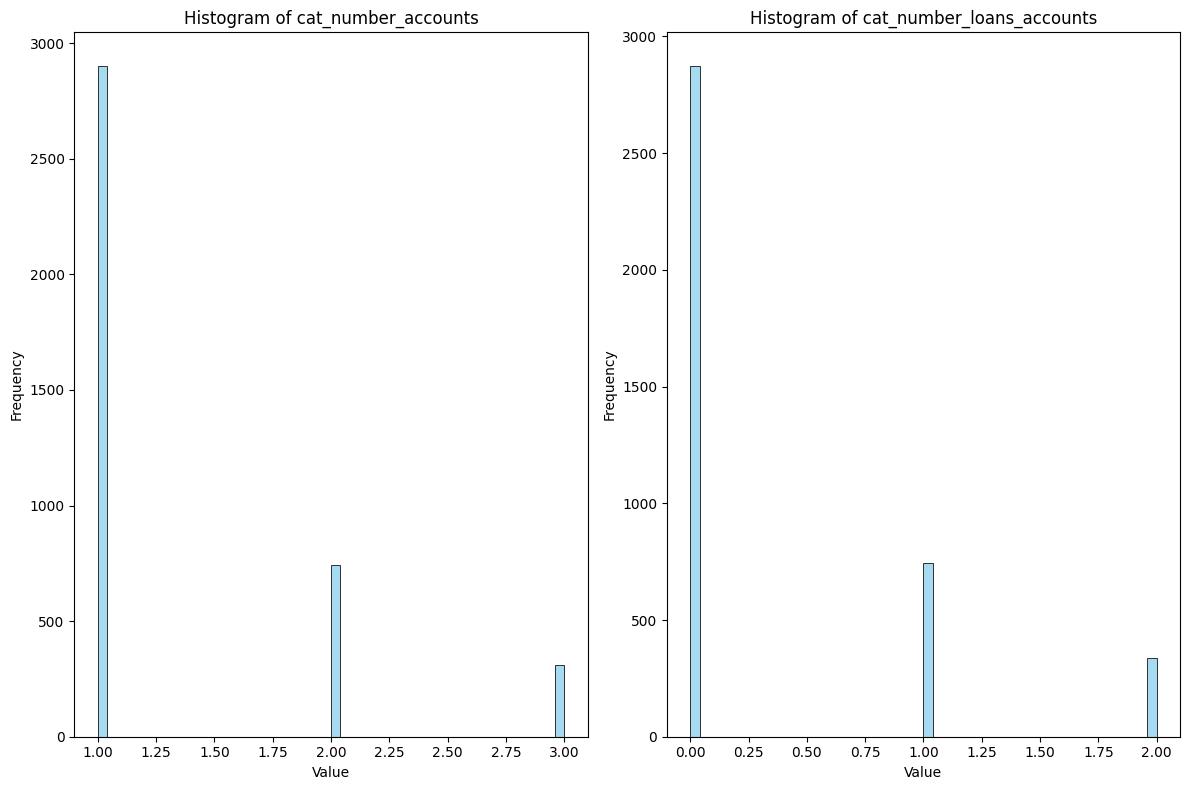

In [19]:
# Plot histograms for each numerical features to visualize the outliers
plt.figure(figsize=(12, 8))
for idx, num_feat in enumerate(["cat_number_accounts", "cat_number_loans_accounts"], 1):
    plt.subplot(1, 2, idx)
    sns.histplot(rows_with_nulls[num_feat], kde=False, bins=50, color="skyblue")
    plt.title(f"Histogram of {num_feat}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# IT SUPPORTS MY ASSUMPTION, OUT OF 4 THOUSANDS MISSING VALUE, 3 THOUSANDS ARE COMING FROM FRESH CUSTOMERS.
# REMANINGS ARE PROBABLY NON-ACTIVE CUSTOMERS AT THE TIME BEING.

# So, at the preprocessin step, I will replace missing values in 'average_salary', 'average_current_acc_balance',
# 'average_saving_account_balance', 'average_credit_card_balance', 'average_monthly_balance', 
# 'average_debt_to_income_ratio' with -999 to represent "UNKNOWN" in numerical features.

In [20]:
# Save the modified DataFrame to a new CSV file
default_df.to_csv("../processed_data/final_df.csv", index=False)

#### Analyse Skewness in Numerical Features

In [21]:
import numpy as np
NUMERICAL_FEATS = ["age", "relationship_length", \
        "average_salary", "average_current_acc_balance", "average_monthly_balance", \
            "requested_amount", "payback_amount", "installment", \
    "number_client_calls_to_ING", "average_saving_account_balance", "average_credit_card_balance", \
        "average_debt_to_income_ratio"]

# Check skewness for numerical features
skewness_threshold = 0.7  
    
# Identify skewed features
skewness = np.abs(default_df[NUMERICAL_FEATS].apply(lambda x: x.skew()))
skewed_features = skewness[skewness > skewness_threshold].index
skewed_features

Index(['requested_amount', 'payback_amount', 'installment',
       'number_client_calls_to_ING', 'average_saving_account_balance',
       'average_credit_card_balance', 'average_debt_to_income_ratio'],
      dtype='object')